In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#Importing the dataset
Car=pd.read_csv(r"C:\Users\Akshay Yadav\Downloads\Data Science\Assignment\Assignment-05-Multi-Linear Regression\ToyotaCorolla.csv",encoding='latin1')
Car.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
#EDA
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
#Checking for Missing null values
Car.isnull().sum()

#Observation- no missing values in the dataset

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [8]:
#Selecting only required column by concat
Car2=pd.concat([Car.iloc[:,2:4],Car.iloc[:,6:7],Car.iloc[:,8:9],Car.iloc[:,12:14],Car.iloc[:,15:18]],axis=1)
Car2.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
#Renaming the dataset so that it doesn't have any symbol
Car3=Car2.rename({"Age_08_04":"Age","cc":"CC","Quarterly_Tax":"QT"},axis=1)
Car3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


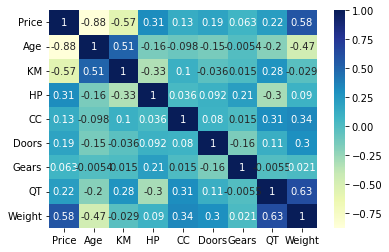

In [10]:
# plotting correlation heatmap
dataplot = sns.heatmap(Car3.corr(), cmap="YlGnBu", annot=True)

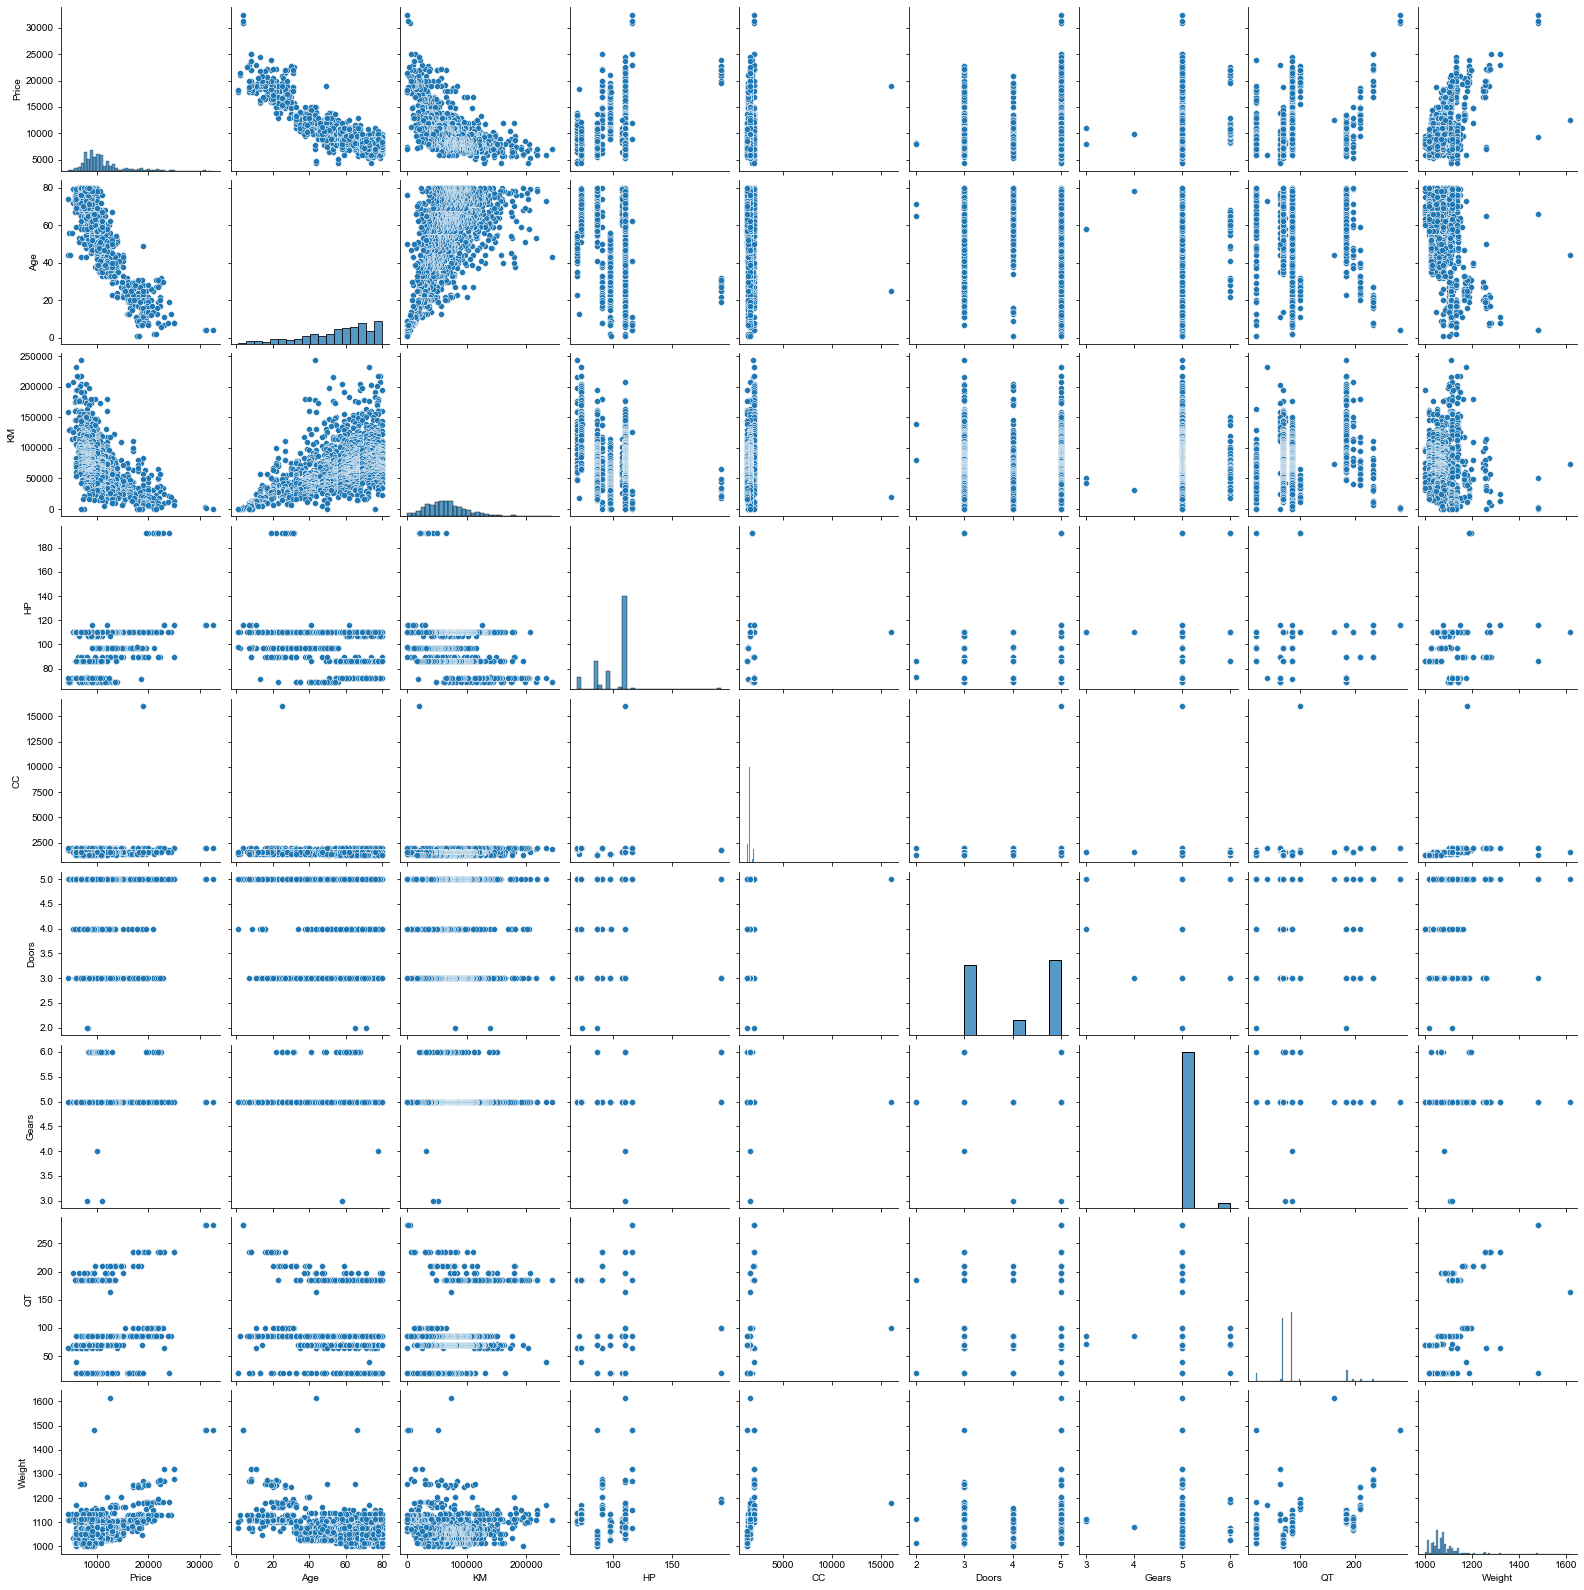

In [11]:
sns.pairplot(Car3, kind="scatter")
sns.set_style(style="darkgrid")

# Model Preparing

In [12]:
#Building model

#Importing necessary library
import statsmodels.formula.api as smf

#Creating the model object & Model fitting
model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=Car3).fit()

In [13]:
#Coefficients parameters- these are coefficients beta value
model.params

#Observation: we have created a model but it can be right or wrong but we are doing this to check whether it is significant or not & 
#we will deploy in model only if it is significant.

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [14]:
#t and p values
print(model.tvalues,"\n",model.pvalues)

#Observation: we will check p-value significance

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
CC           -1.344222
Doors        -0.040410
Gears         3.016007
QT            3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
CC            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
QT            2.619148e-03
Weight        2.048576e-52
dtype: float64


In [15]:
#R-squared
(model.rsquared,model.rsquared_adj)

#Observation: Corelation higher is better(0-1 range) 
#Higher the r-square means smaller difference in observed and fitted values
#Model accuracy is 86%

(0.8637627463428192, 0.8629989775766963)

# Simple linear Regression model

In [16]:
ml_v=smf.ols("Price~CC",data=Car3).fit()

#t and p values
print(ml_v.tvalues,'\n', ml_v.pvalues)

#Observation: CC has significant value

Intercept    24.694090
CC            4.824822
dtype: float64 
 Intercept    1.766912e-112
CC            1.550808e-06
dtype: float64


In [17]:
ml_w=smf.ols("Price~Doors",data=Car3).fit()

#t and p values
print(ml_v.tvalues,'\n',ml_v.pvalues)

#Observation: Door has significant value

Intercept    24.694090
CC            4.824822
dtype: float64 
 Intercept    1.766912e-112
CC            1.550808e-06
dtype: float64


In [18]:
ml_wv=smf.ols("Price~CC+Doors",data=Car3).fit()
print(ml_wv.tvalues,'\n',ml_wv.pvalues)

#Obs: CC & Doors have significant p-value

Intercept    12.620704
CC            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
CC           1.521992e-05
Doors        1.373469e-11
dtype: float64


# Calculating Variance Inflation Factor

In [19]:
#Checking for collinearity and VIF all independent variance
rsq_Age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=Car3).fit().rsquared
vif_Age=1/(1-rsq_Age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=Car3).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=Car3).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=Car3).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_Doors=smf.ols('Doors~Age+KM+CC+HP+Gears+QT+Weight',data=Car3).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~Age+KM+CC+Doors+HP+QT+Weight',data=Car3).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_QT=smf.ols('QT~Age+KM+CC+Doors+HP+Doors+Weight',data=Car3).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_Weight=smf.ols('Weight~Age+KM+CC+Doors+HP+Doors+QT',data=Car3).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

#Obs: we are not using "Y" anywhere only "X" variables

In [20]:
#Putting all VIF values in DataFrame
D1={"Variables":['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
Vif_frame=pd.DataFrame(D1)
Vif_frame

#Obs: VIF=>5 value should be removed.
#Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.306970
7,Weight,2.516248


# Residual Analysis-Q-QPlot

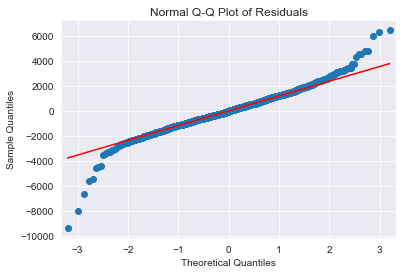

In [21]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')  #line=45 to draw a diagonal line
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

#Obs: Most of the points are falling on Theoretical Quantities(Red line) 
#so it's normally distributed Q-Q Plot & it's symmetric with fat tail. 

In [22]:
#Outlier detection above Q-Q Plot of residual

list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [23]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

# Residual plot for homoscedasticity

In [24]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

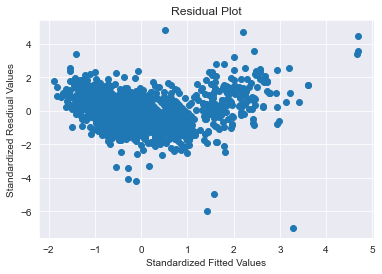

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Resdiual Values")
plt.show()

#Obs: NO pattern observed

# Residual vs Regressor

eval_env: 1


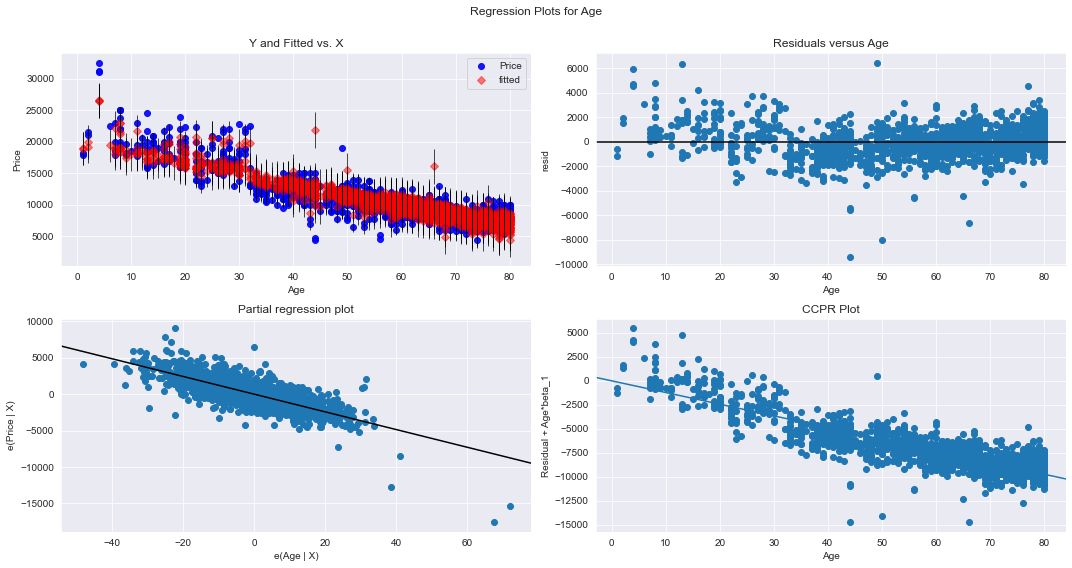

In [26]:
import statsmodels.api as sm
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()



eval_env: 1


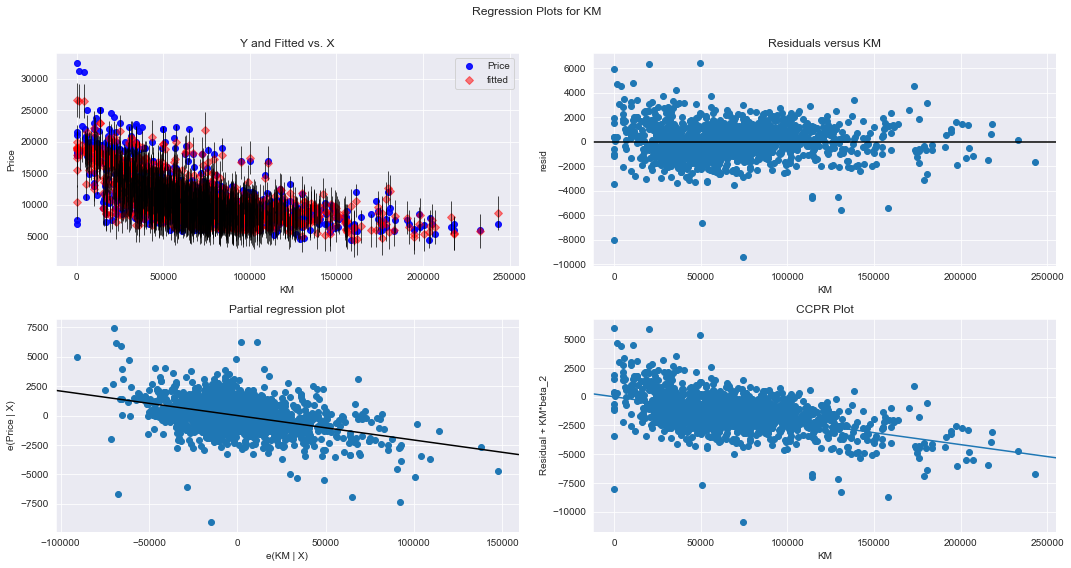

In [27]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

eval_env: 1


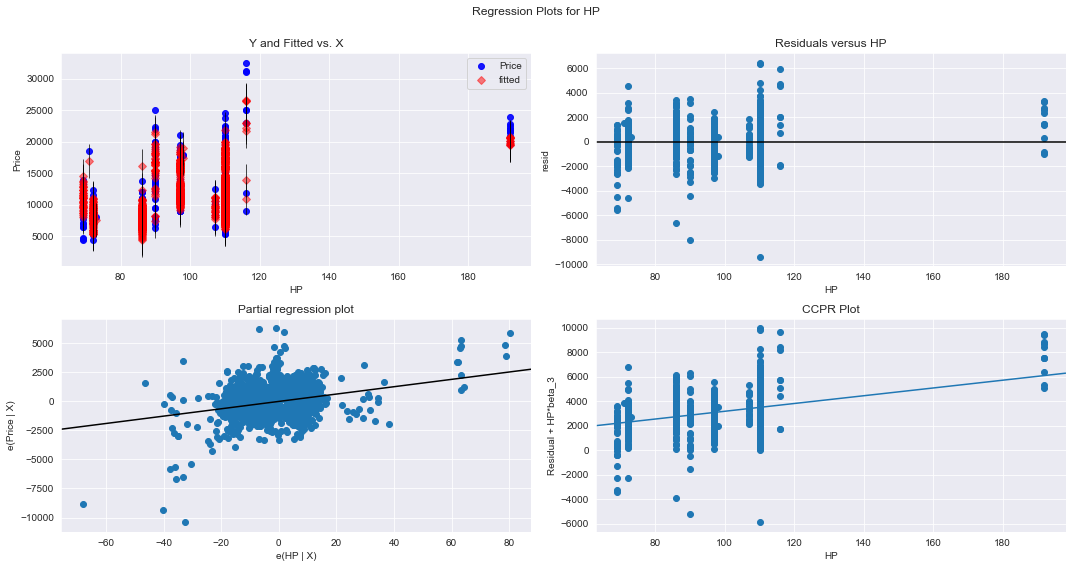

In [28]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

eval_env: 1


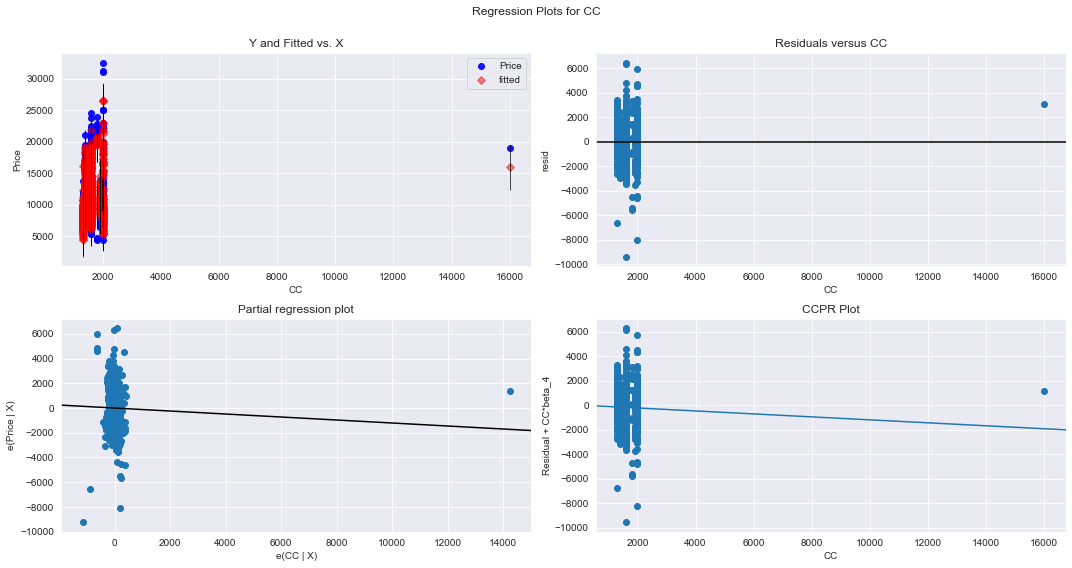

In [29]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"CC",fig=fig)
plt.show()

eval_env: 1


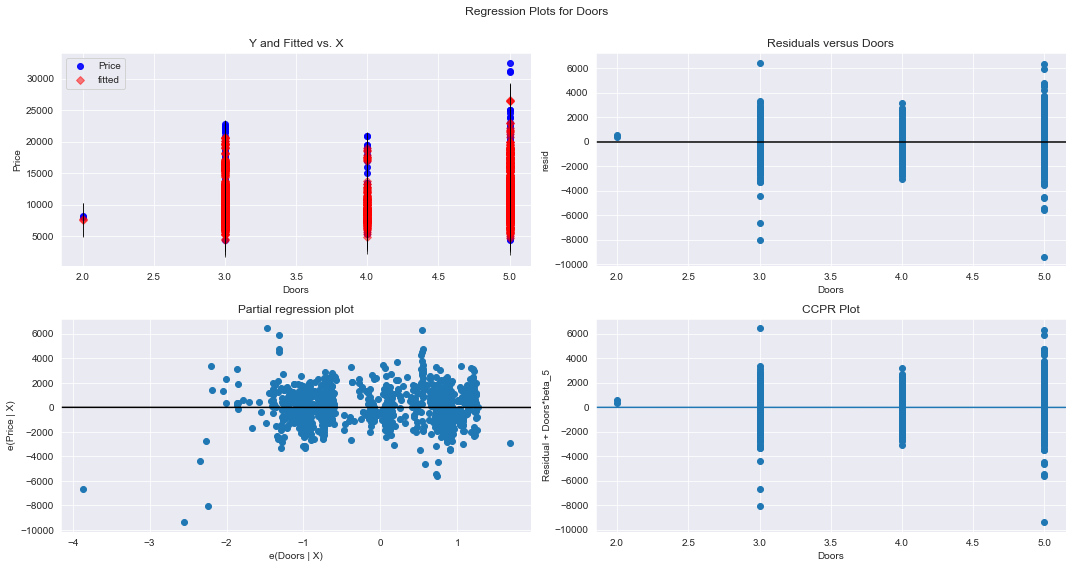

In [30]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

eval_env: 1


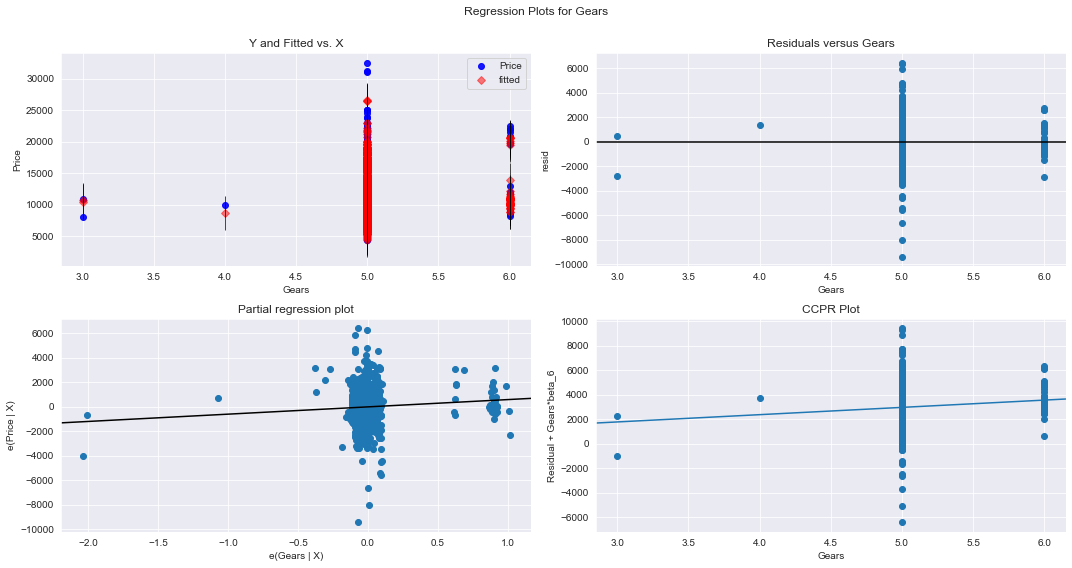

In [31]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

eval_env: 1


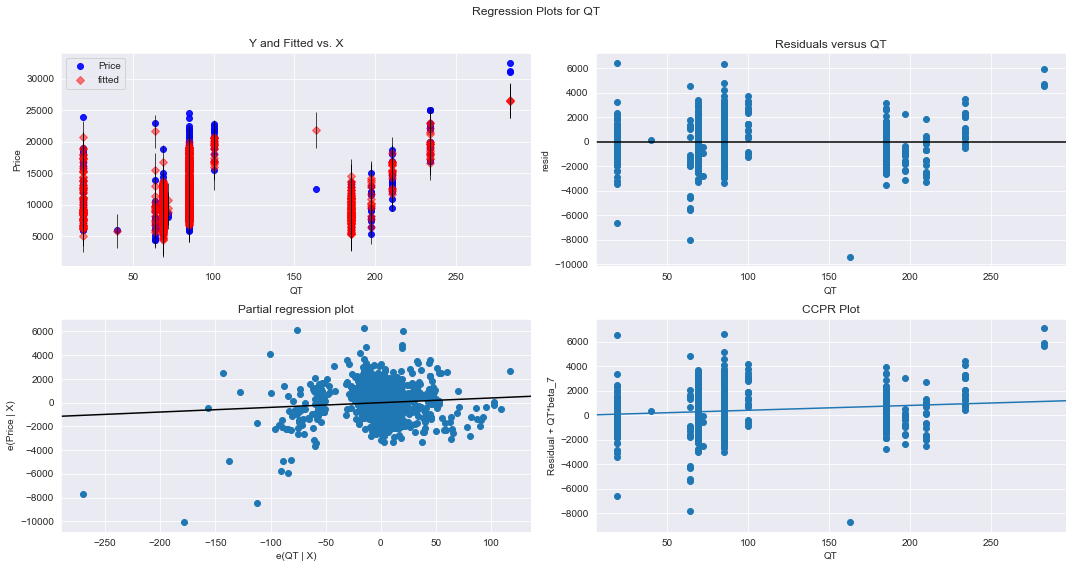

In [32]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"QT",fig=fig)
plt.show()

eval_env: 1


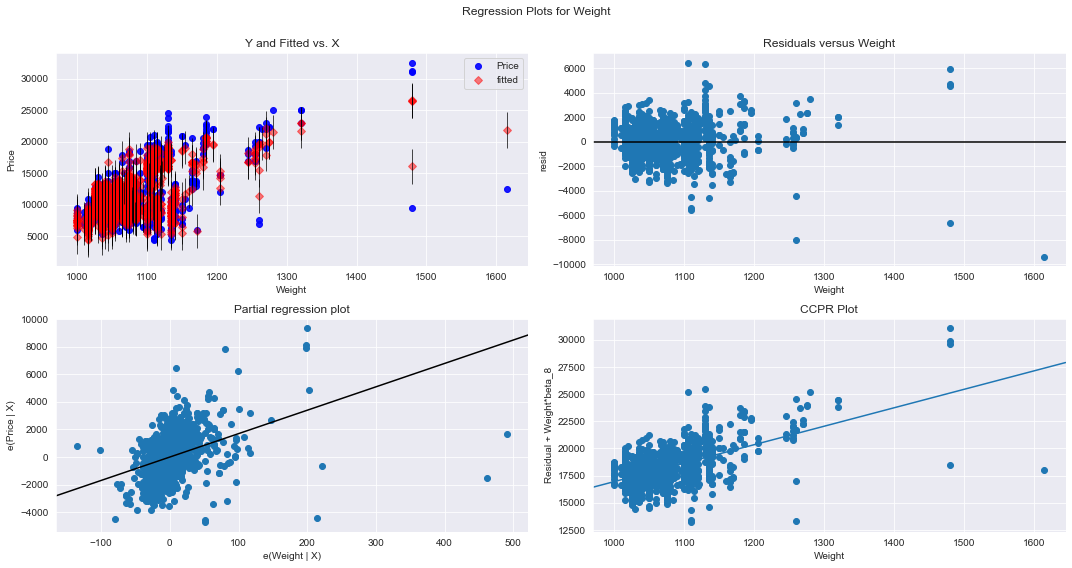

In [33]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

# Model Deletion Diagnostic[Detecting outlier/influencer]



In [36]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [37]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

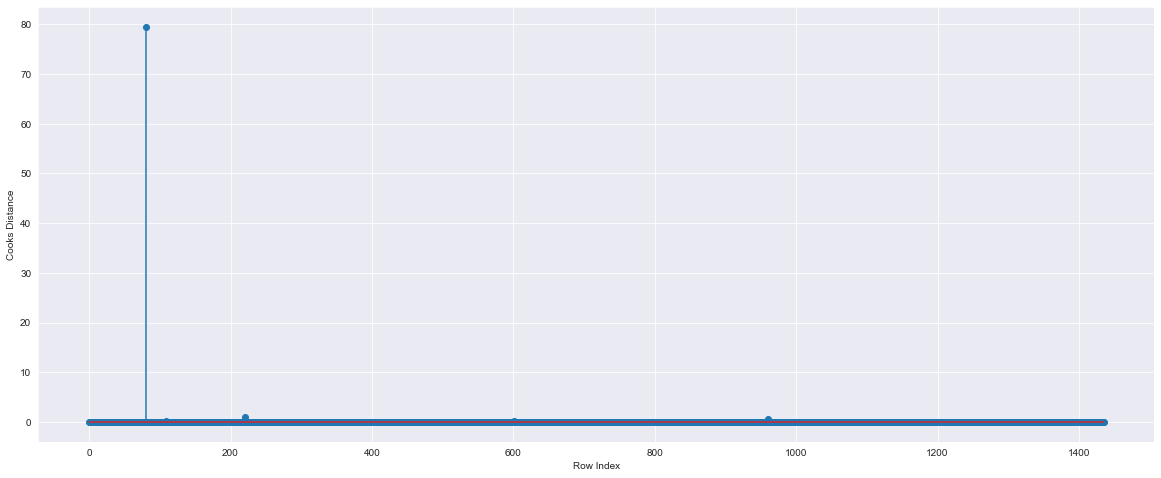

In [40]:
#Plot the influencer
fig=plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(Car3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
#Index and influencer where value of c>0.5
np.argmax(c) , np.max(c)

#Obs: more it is closer to zero it is more influencer.

(80, 79.52010624138181)

# High Influence Points

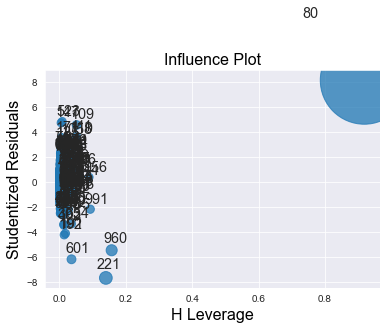

In [54]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model,size=88,plot_alpha=0.75)
plt.show()

#Obs: bigger the graph more is the influence

In [53]:
#Leverage cutoff
k=Car3.shape[1]
n=Car3.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

#Obs: The higher the leverage value of an observation, the more potential it has to impact the fitted model

0.020891364902506964

In [62]:
Car3[Car3.index.isin([80,79])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
79,14900,30,22000,97,1400,5,5,85,1110
80,18950,25,20019,110,16000,5,5,100,1180


In [63]:
Car3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [59]:
Car3.head(82)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
77,18450,27,23489,110,1600,5,5,85,1115
78,16895,29,22575,110,1600,5,5,85,1115
79,14900,30,22000,97,1400,5,5,85,1110
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [70]:
#Load the data
Car4=Car3.copy()
Car4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [72]:
#Removing Influencer from the dataset
Car5=Car4.drop(Car4.index[[80]],axis=0).reset_index(drop=True)
Car5

#Obs: now index also have been reset

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagonistics and Final Model

In [75]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=Car5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    Car5=Car5.drop(Car5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    Car5
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=Car5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)
    
    
#Obs: AIC lower the better and R-square higher the better

Thus model accuracy is improved to 0.8894191849749751


# Model Predictions

In [77]:
#New data prediction
New_data=pd.DataFrame({'Age':13,"KM":38000,"HP":100,"CC":2200,"Doors":3,"Gears":5,"QT":250,"Weight":1200},index=[0])
New_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13,38000,100,2200,3,5,250,1200


In [78]:
#Now doing Price prediction manually
final_model.predict(New_data)

0    18492.801871
dtype: float64

In [79]:
Pred_y=final_model.predict(Car5)
Pred_y

0       16351.012991
1       15891.824421
2       16334.021007
3       16002.080259
4       15889.835926
            ...     
1427     9161.797882
1428     8536.169181
1429     8681.605150
1430     8793.704782
1431    10863.423359
Length: 1432, dtype: float64